# [Table Of Contents](#)
### The Art of Data Storytelling

# The Global Superstore Case

This page contains student files for the case "Modern Retail Analytics: Data Visualization Using Tableau." It includes three detailed tutorials that can be used by instructors in the classroom to introduce students to Tableau and Data Storytelling in the context of retail strategy and operations (using the [Global Superstore dataset](files/Global.Superstore.xlsx) that is made available with Tableau). 

### Assignment Three

1. Assess Nigeria’s profitability (i.e., total profit) for 2014. How does it compare to other African countries?
2. What factors might be responsible for Nigeria’s poor performance? You might want to investigate shipping costs and the average discount as potential root causes.

In [1]:
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
fileName="Global.Superstore.xlsx"
df = pd.read_excel(fileName)

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2014-07-31,2014-07-31 00:00:00,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2015-02-05,2015-02-07 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2015-10-17,2015-10-18 00:00:00,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2015-01-28,2015-01-30 00:00:00,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2015-11-05,2015-11-06 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [98]:
print(df.shape)
print(df.columns)

(51290, 24)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [99]:
#Selecting African countries
africaProfitData = df[df["Region"]=="Africa"]
africaProfitData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
4,47221,SG-2013-4320,2015-11-05,2015-11-06 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical
19,49463,TZ-2014-8190,2016-12-05,2016-12-07 00:00:00,Second Class,RH-9555,Ritsa Hightower,Consumer,Uvinza,Kigoma,...,OFF-KIT-10004058,Office Supplies,Appliances,"KitchenAid Stove, White",3409.74,6,0.0,818.28,763.38,High
35,47905,CG-2011-8610,2013-09-14,2013-09-15 00:00:00,First Class,AH-30,Aaron Hawkins,Corporate,Kamina,Katanga,...,TEC-APP-10000308,Technology,Phones,"Apple Smart Phone, Full Size",3817.26,6,0.0,1068.66,678.15,High
54,42336,MZ-2013-3690,2015-12-18,2015-12-18 00:00:00,Same Day,DG-3300,Deirdre Greer,Corporate,Maputo,Cidade De Maputo,...,TEC-MOT-10002272,Technology,Phones,"Motorola Smart Phone, with Caller ID",2582.16,4,0.0,593.88,627.17,High
72,49085,CG-2013-6110,2015-03-29,2015-03-31 00:00:00,Second Class,BW-1065,Barry Weirich,Consumer,Kananga,Kasai-Occidental,...,FUR-HAR-10002873,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, ...",3808.80,8,0.0,1523.52,588.13,High


In [101]:
# This is to extract only required features 
def dataPropSelect1(Features1,africaProfitData,Properties):#Features1 are the variables that are given by columns and properties are sum, mean, median etc
    Features11 = [] 
    for i in Features1: 
        if i not in Features11: 
            Features11.append(i)
    Features11
    Features=Features1[1:]
    Properties1=["sum","mean"]
    profit_grouped_country =africaProfitData[Features11].groupby("Country").agg(["sum","mean"])
    Tuple_list=list(map(lambda x,y:(x,y),Features,Properties))
    newDataUpd = profit_grouped_country[Tuple_list]
    for i in Tuple_list:
        val=newDataUpd[[i]].to_numpy().ravel()
        sval='_'.join(i)
        newDataUpd[sval]=val.tolist()
    return newDataUpd.drop(Features,1)

In [117]:
Features=["Country", "Profit","Sales","Shipping Cost","Shipping Cost","Discount","Discount","Quantity"]
Properties=["sum","mean","mean","sum","mean","sum","sum"]
newdf=dataPropSelect1(Features,africaProfitData,Properties)

C:\Users\maeinss\.conda\envs\snakes\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [118]:
newdf["Countries"]=newdf.index
newdf=newdf.sort_values("Profit_sum")
newdf.iloc[np.r_[0:5, -5:0]]

,Profit_sum,Sales_mean,Shipping Cost_mean,Shipping Cost_sum,Discount_mean,Discount_sum,Quantity_sum,Countries
,,,,,,,,
Country,,,,,,,,
Nigeria,-80750.718,60.055638,6.832166,6183.11,0.7,633.5,2056,Nigeria
Zimbabwe,-5428.785,47.063813,5.952750,476.22,0.7,56.0,190,Zimbabwe
Uganda,-2426.085,43.836081,4.483514,165.89,0.7,25.9,63,Uganda
Equatorial Guinea,44.460,50.170000,3.126667,9.38,0.0,0.0,3,Equatorial Guinea
Eritrea,76.200,93.870000,4.275000,8.55,0.0,0.0,4,Eritrea
Algeria,9106.500,184.140765,19.012296,3726.41,0.0,0.0,454,Algeria
Egypt,19702.230,172.770678,18.227598,8876.84,0.0,0.0,1123,Egypt
Democratic Republic of the Congo,21860.580,230.650607,26.219631,9937.24,0.0,0.0,903,Democratic Republic of the Congo


In [119]:
def dataC(Class,x):
    return newdf[newdf["Countries"]==x][Class]
print("Nigeria total profit for 2014: "+ str(dataC("Profit_sum","Nigeria")[0]))

Nigeria total profit for 2014: -80750.71799999978


In [120]:
def plot_show(feature1):
    fig=plt.figure(1)
    ax1 = plt.subplot(221)
    newdf[(feature1)][0:11].plot.bar(x='Countries', y='Profit', ax=ax1, figsize=(15, 8), title='10 Countries with least Profit',color ="blue")
    plt.xlabel("Countries",fontsize=18)
    plt.ylabel(feature1,fontsize=18)
    plt.suptitle('Comparision', fontsize=25)
    plt.title('10 Countries with least Profit', size = 18)
    ax2 = plt.subplot(222)
    newdf[(feature1)][-10:].plot.bar(x='Countries', y='Profit', ax=ax2, figsize=(15, 8), title='10 Countries with highest Profit',color="red")
    plt.xlabel("Countries",fontsize=18)
    plt.ylabel(feature1,fontsize=18)
    plt.title('10 Countries with highest Profit', size = 18)
    fig.subplots_adjust(wspace=.5)
    return plt.show()

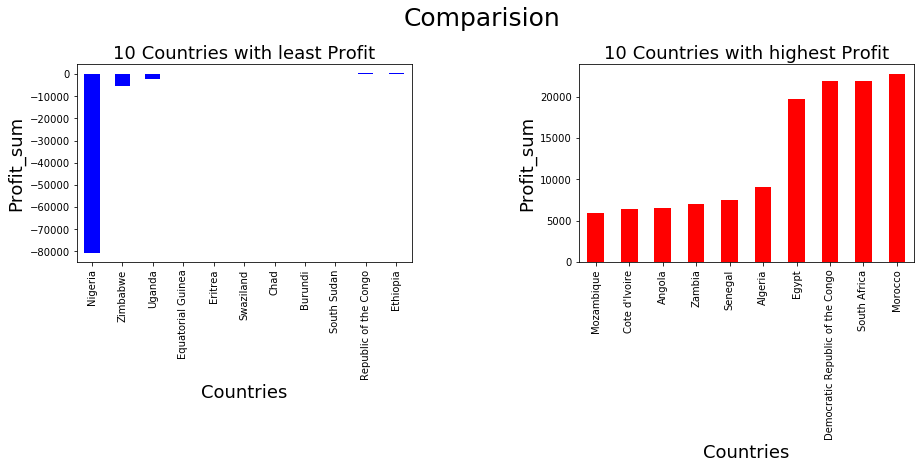

In [121]:
plot_show("Profit_sum")

In [122]:
#Doing a linear regression 
from sklearn.linear_model import LinearRegression

In [123]:
X1 = list(newdf)
X2=["".join(i) for i in X1]
x1=X2[1:-1]
y1=X2[0]
x1,y1

(['Sales_mean',
  'Shipping Cost_mean',
  'Shipping Cost_sum',
  'Discount_mean',
  'Discount_sum',
  'Quantity_sum'],
 'Profit_sum')

In [124]:
X=newdf[x1]
y=newdf[y1]
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [126]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [127]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,,Coefficient
Sales_mean,,1.545874
Shipping Cost_mean,,-10.152807
Shipping Cost_sum,,1.313528
Discount_mean,,2242.198731
Discount_sum,,-169.574464
Quantity_sum,,8.287083


We See Discount_mean and Discount_sum have very high co-orelation with the profit.

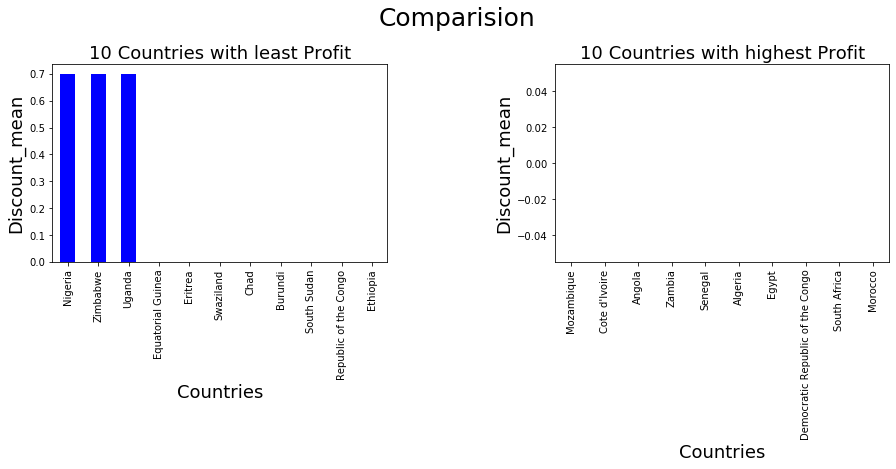

In [163]:
plot_show("Discount_mean")

In [ ]:
plot_show("Discount_mean")

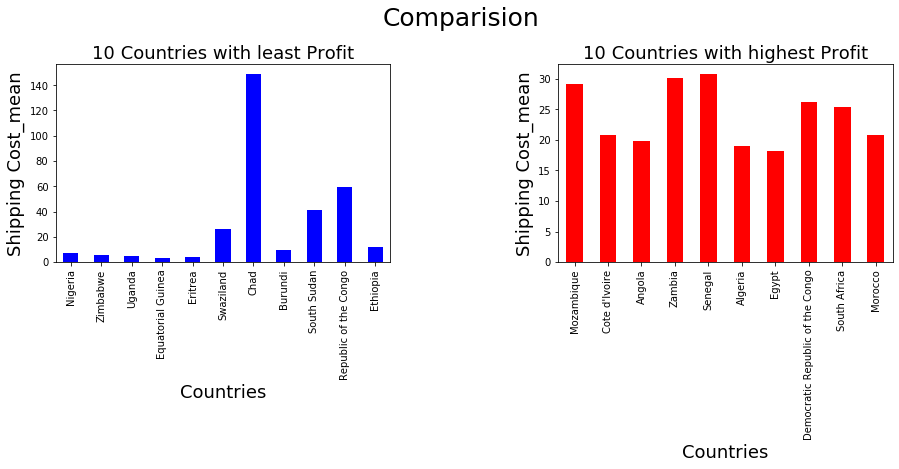

In [112]:
plot_show("Shipping Cost_mean")